# Learning Outcomes

In this unit, we are going to talk about more advances algorithms such as Neural Networks which are typically supervised algorithms! But, before that, we are going to introduce an unsupervised learing algorithms known as K-means algorithm. 

- Understand how the K-Means algorithm works
- Find out how hyperparameter tuning is done for the K-means algorithm

# K-Means Algorithm

K-means is a non parametric unsupervised model (no labels are provided). The goal in K-means is to organize data such that similar data belongs to the same cluster. A cluster contains a set of data points, data within each cluster are similar to each other and are dissimilar to data points from other clusters. 

Let the set of data points be $x = \{x_1, x_2, x_3, ..., x_n\}$ the K-means algorithm **partitions** the data into K clusters. Each cluster has a center (called centroid). Number of clusters (K) is set by the user thus is a hyperparameter. Here, are the steps which we normally take to make clusers:

1. Randomly set K data points as initial centroids. 
2. Assign each data point to the closest centroid.
3. Re-computer the centroids. 
4. Repeat step 2 and 3 till convergence criterion is met.

Convergence criterion can be listed as:

- minimum re-assignments of data points to different clusters (most points in each cluster are similar to each other and dissimilar to the point from other clusters)
- miminum change in centroids
- mimimum decrease in the sum of squared errors (SSE). SSE is defined as follows:

$\sum_{i=1} ^{k} \sum_{x\in C_i} dist(c_i, x)$

where $dist(c_i, x)$ is the Euclidean distance between the two object in the Euclidean space. 

More discussions and examples can be found here:
http://www.yorku.ca/ptryfos/f1500.pdf

KNN is simple and it is easy to implement, but as the data grows larger the algorithm becomes slow. Although, for real time clustering of data KNN might not be suitable, for small scaled recommendation systems it can be a good choice.    


# Hyperparameter Tuning

First, we should define a hyperparameter. In general, a hyperparameter is a number in a model that the model cannot estimate and thus must be chosen by the user. In this case, the number of centroids must be chosen by us. 

The goal is to somehow find the optimal numbers of cluster which yields the best clustering result. For this purpose, we can use an **elbow method** in which we run the clustering method for different values of k (for example: from 2 to 12), and for each value of k, we find a score which is the average distance of each point to its assigned center. Plotting the score versus number of clusters (k) gives us an intuition to find out when adding more clusters will not give better (smaller) scores.

 
In the example below:
- We have made a toy dataset (using `make_blobs` that makes blobs of points). 
    - `make_blobs` is a function from the `sklearn.datasets` module that creates blobs that should be easy to categorize.
    - In this case, we know that the optimal number of clusters is 5 because we assigned it!
- Using KMeans (which is part of sklearn cluster library) we fit our dataset to different number of k.
- For each cluster we calculate the average distance from the center of cluster to each point designated to the cluster (the distance metric is Euclidean)
- We plot the score Vs. k

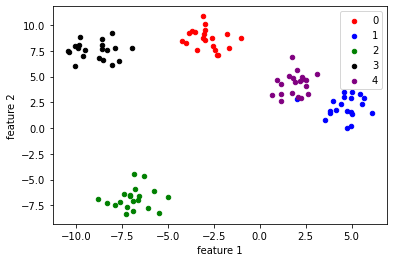

In [1]:
# import all the libraries we need
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# gererate data, using make_blobs function from sklearn.datasets
X, Y = make_blobs(n_samples=100, n_features=2, centers=5, random_state=42)
# make a dictionary to map each datapoint (which has two features) to its y vales 
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
# make a color dictionary to assign each label to a color 
colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'purple'}

fig, ax = plt.subplots()
# groupby the datapoints with respect to their label
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

# put x and y labels
plt.xlabel('feature 1')
plt.ylabel('feature 2')
# show the plot
plt.show()


From the plot above, we can clearly see the different blobs. In the real world, we won't know how many clusters we have, so we'll need to take steps to choose K first. The steps are shown below.

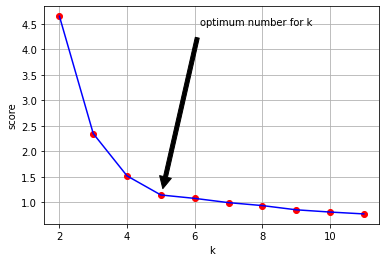

In [2]:
# import needed libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np



# k means determine k
score = []
# distortion computes the sum of squared distances from each point to its assigned center, to do this we use 
#cdist from scipy which is another python library used for mathematics

K = range(2,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    score.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, score, 'ro')
plt.plot(K, score, 'b')

plt.annotate('optimum number for k', xy=(5, 1.1),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.xlabel('k')
plt.ylabel('score')
plt.grid()
plt.show()

# Conclusion

The main purpose of this notbook was to introduce the concept of hyperparameter tuning. The parameters in this model are the centroids, and they're estimated using the distance between points within a cluster and between clusters. In order to choose the number of clusters (the hyperparameter), we had to use a different way to measure the quality of our model. When we did this, we still had to make a subjective call - there's no mathematical definition of where the "elbow" is. 

- K-means is an unsupervised algorithm, its simplicity makes it an attractive model!  
- Using K-means, one can visualize data and clearly see if there exist any pattern/ cluster. 
- Python scikit-learn's library provides the implementation of K-means. For more information on the library check the link below:

https://scikit-learn.org/stable/modules/clustering.html#k-means

- For large scale data, K-means might not be a good choice as it will be computationally really expensive.
- Elbow method is a hyper parameter tuning method used frequently for K-means.

